# Grabcut

In [3]:
# Our Setup, Import Libaries
import dlib
import sys
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg

--2022-09-21 11:37:04--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg [following]
--2022-09-21 11:37:04--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17368 (17K) [image/jpeg]
Saving to: ‘woman.jpeg’

woman.jpeg          100%[===================>]  16.96K  --.-KB/s    in 0s      

2022-09-21 11:37:04 (125 MB/s) - ‘woman.jpeg’ saved [17368/17368]



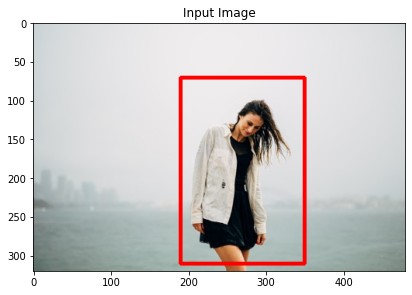

In [5]:
#Load image
image = cv2.imread('woman.jpeg')
copy = image.copy()

#Create a mask (Of Zeros uint8 datatype) that is the same size (width, height) as our original Image
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

#Needs to be set manually or selected with cv2.selectROI()
x1, y1, x2, y2 = 190, 70, 350, 310
start = (x1, y1)
end = (x2, y2)

#Format is X,Y,W,H
rect = (x1, y1, x2-x1, y2-y1)

#show Rectangle
cv2.rectangle(copy, start, end, (0, 0, 255), 3)
imshow("Input Image", copy)

#### GrabCut Arguements

img - Inout Image
mask - Mask image where we specify areas are background, foreground or portable background/foreground etc. It is done by following flags cv.GC_BGD, cv.GC_FGD, cv.GC_PR_BGD, cv.GC_PR_FGD or simple pass 0,1,2,3 to image
rect - Cordinates of rectangle which includes foreground image
bgdModel, fgdModel - Arrays used by algorithm internally
iterCount - Number of iterations the algorithm should run
mode - cv.GC_INIT_WITH_RECT or cv.GC_INIT_WITH_MASK or combined which decides weather we are drawing rectangle or final touchup strokes



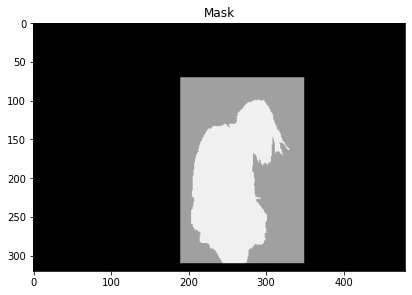

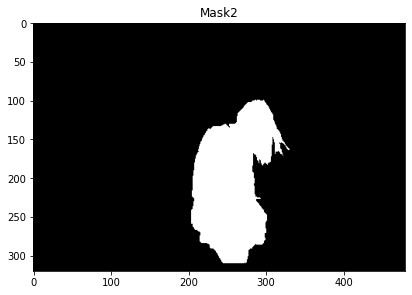

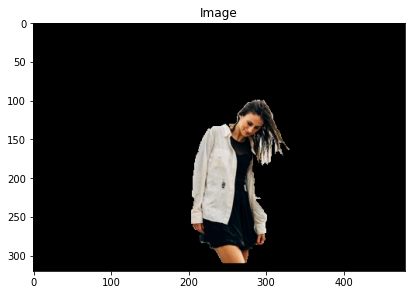

In [10]:
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
image = image*mask2[:,:,np.newaxis]

imshow("Mask", mask*80)
imshow("Mask2", mask2*255)
imshow("Image", image)